## SIT789 Task-2.3D

In [1]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt

In [2]:
doc = cv.imread('doc.jpg', 0) #Note that the second parameter of imread is set to 0
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)
cv.imwrite('doc_bin.png', doc_bin)

True

In [3]:
doc_bin = 255 - doc_bin #convert black/white to white/black

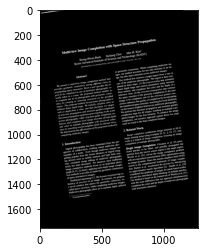

In [4]:
plt.imshow(doc_bin, 'gray')

In [5]:
# connected component labelling
num_labels, labels_im = cv.connectedComponents(doc_bin)

In [6]:
def ExtractConnectedComponents(num_labels, labels_im):
    connected_components = [[] for i in range(0, num_labels)]
    height, width = labels_im.shape
    for i in range(0, height):
        for j in range(0, width):
            if labels_im[i, j] >= 0:
                connected_components[labels_im[i, j]].append((j, i))
    return connected_components

In [7]:
connected_components = ExtractConnectedComponents(num_labels, labels_im)

In [8]:
def get_ycordinate_based_candidate(connected_components):
    candidate_points = []
    for x in connected_components:
        res = max(x, key = lambda i : i[1])
        #print(res[0], res[1])
        candidate_points.append([res[0], res[1]])
    return candidate_points

In [9]:
maxy_based_candidate_points = get_ycordinate_based_candidate(connected_components)
maxy_based_candidate_points

[[1, 1751],
 [0, 28],
 [1020, 0],
 [1271, 9],
 [1078, 2],
 [663, 8],
 [1157, 10],
 [0, 20],
 [0, 22],
 [40, 23],
 [177, 132],
 [13, 154],
 [248, 191],
 [942, 209],
 [895, 236],
 [917, 249],
 [889, 253],
 [906, 250],
 [860, 262],
 [873, 255],
 [845, 259],
 [786, 267],
 [830, 267],
 [803, 265],
 [756, 272],
 [733, 275],
 [743, 274],
 [666, 285],
 [684, 282],
 [691, 281],
 [724, 277],
 [304, 275],
 [590, 295],
 [636, 288],
 [651, 287],
 [622, 291],
 [606, 299],
 [567, 298],
 [550, 285],
 [560, 299],
 [535, 303],
 [485, 294],
 [508, 307],
 [457, 314],
 [480, 311],
 [496, 308],
 [486, 310],
 [470, 313],
 [390, 323],
 [442, 322],
 [418, 319],
 [409, 321],
 [354, 334],
 [367, 326],
 [304, 336],
 [340, 331],
 [315, 334],
 [257, 327],
 [811, 328],
 [283, 339],
 [236, 330],
 [771, 344],
 [787, 328],
 [219, 347],
 [229, 346],
 [249, 343],
 [268, 341],
 [794, 341],
 [742, 348],
 [788, 342],
 [177, 353],
 [205, 349],
 [698, 354],
 [718, 337],
 [725, 351],
 [719, 351],
 [651, 347],
 [761, 346],
 [84

In [10]:
tr_candidate_points_x = []
tr_candidate_points_y = []

for k in maxy_based_candidate_points:
    tr_candidate_points_x.append(k[0])
    tr_candidate_points_y.append(k[1])
    

In [11]:
new = doc_bin.copy()

In [12]:
x_index = 0

for pixel in new:    
    y_index = 0
    for v in pixel:
        
        if(x_index in tr_candidate_points_x and y_index in tr_candidate_points_y):
            continue
        else:
            new[x_index][y_index] = 0
            
        y_index += 1
    
    x_index += 1    

In [13]:
import math
distance_resolution = 1
angular_resolution = np.pi/180
density_threshold = 10

In [14]:
lines = cv.HoughLines(np.array(new), distance_resolution, angular_resolution, density_threshold)
lines

array([[[857.       ,   1.43117  ]],

       [[880.       ,   1.43117  ]],

       [[374.       ,   1.43117  ]],

       ...,

       [[457.       ,   2.565634 ]],

       [[278.       ,   2.7227137]],

       [[279.       ,   2.740167 ]]], dtype=float32)

In [15]:
detected_angle = []
for line in lines:
    distance, angle = line[0]
    detected_angle.append(angle)

In [16]:
import statistics
median_angle = statistics.median(detected_angle)
median_angle

1.3613569

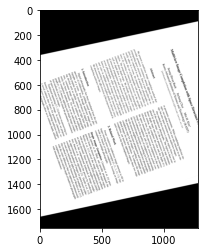

In [17]:
#median_angle = 0.13556331
# rotate image
height, width = doc.shape
c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
c = (c_x, c_y) # A point is defined by x and y coordinate
M = cv.getRotationMatrix2D(c, -median_angle * 180 / math.pi, 1)
doc_deskewed = cv.warpAffine(doc, M, (width, height))
plt.imshow(doc_deskewed, "gray")